In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2021-01-05T17:00:00,15,Campania,1372,97,1469,74891,76360,-1137,688,...,33.0,7425.0,4193.0,-1133.0,6.60,1.92,9.27,16.41,1.04,-1.47
316,2021-01-06T17:00:00,15,Campania,1362,99,1461,74882,76343,-17,1366,...,19.0,17212.0,14675.0,-9.0,6.78,1.91,7.94,9.31,2.06,-0.02
317,2021-01-07T17:00:00,15,Campania,1385,96,1481,74878,76359,16,1052,...,39.0,11930.0,6493.0,-4.0,6.48,1.94,8.82,16.20,-3.03,0.02
318,2021-01-08T17:00:00,15,Campania,1395,100,1495,73651,75146,-1213,984,...,46.0,8889.0,4697.0,-1227.0,6.69,1.99,11.07,20.95,4.17,-1.59


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1263
Nuovi tamponi: 14714.0
Percentuale nuovi positivi/nuovi tamponi: 8.6 %
Nuovi guariti: 1097.0
Nuovi deceduti: 36.0
Variazione positivi ricoverati con sintomi: -19.0
Variazione positivi in terapia intensiva: 7.0
Variazione positivi in isolamento dimiciliare: 142.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,15,Campania,2061,193,2254,71974,74228,1908,2716,...,18.0,14290.0,11067.0,1794.0,8.56,3.04,19.01,24.54,1.05,2.64
1,2020-11-11T17:00:00,15,Campania,2077,181,2258,74412,76670,2442,3166,...,34.0,18446.0,15137.0,2438.0,8.02,2.95,17.16,20.92,-6.22,3.29
2,2020-11-12T17:00:00,15,Campania,1944,192,2136,77923,80059,3389,4065,...,31.0,23840.0,19543.0,3511.0,8.99,2.67,17.05,20.80,6.08,4.42
3,2020-11-13T17:00:00,15,Campania,2153,183,2336,80884,83220,3161,4079,...,40.0,25510.0,19678.0,2961.0,7.83,2.81,15.99,20.73,-4.69,3.95
4,2020-11-14T17:00:00,15,Campania,2080,184,2264,82982,85246,2026,3351,...,27.0,20662.0,17496.0,2098.0,8.13,2.66,16.22,19.15,0.55,2.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-05T17:00:00,15,Campania,1372,97,1469,74891,76360,-1137,688,...,33.0,7425.0,4193.0,-1133.0,6.60,1.92,9.27,16.41,1.04,-1.47
57,2021-01-06T17:00:00,15,Campania,1362,99,1461,74882,76343,-17,1366,...,19.0,17212.0,14675.0,-9.0,6.78,1.91,7.94,9.31,2.06,-0.02
58,2021-01-07T17:00:00,15,Campania,1385,96,1481,74878,76359,16,1052,...,39.0,11930.0,6493.0,-4.0,6.48,1.94,8.82,16.20,-3.03,0.02
59,2021-01-08T17:00:00,15,Campania,1395,100,1495,73651,75146,-1213,984,...,46.0,8889.0,4697.0,-1227.0,6.69,1.99,11.07,20.95,4.17,-1.59


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

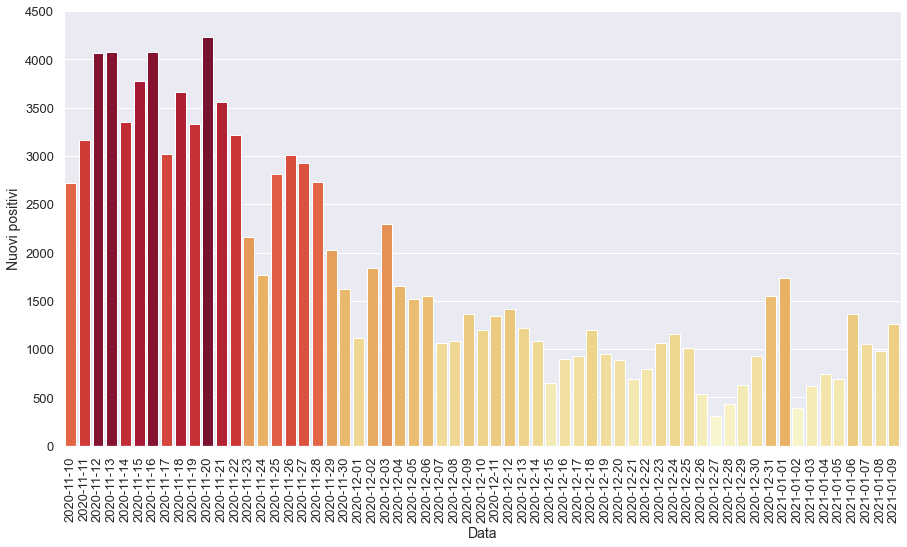

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

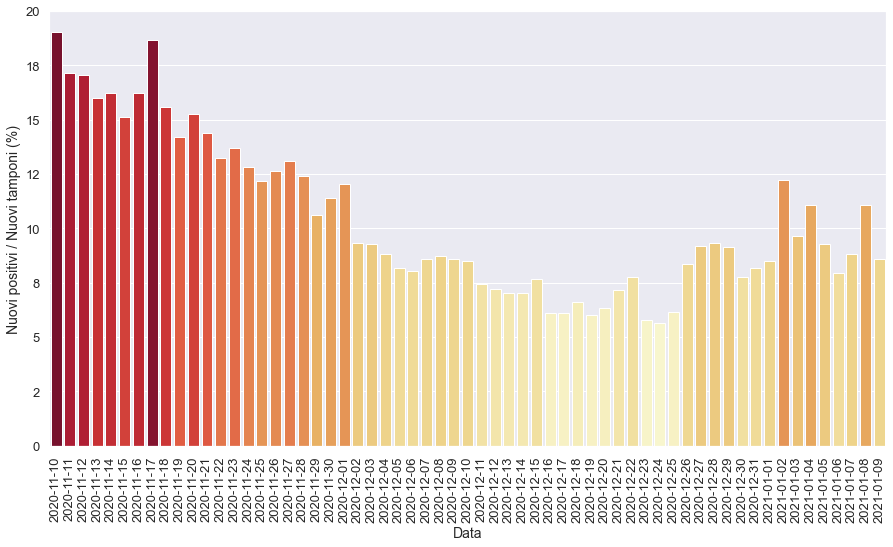

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

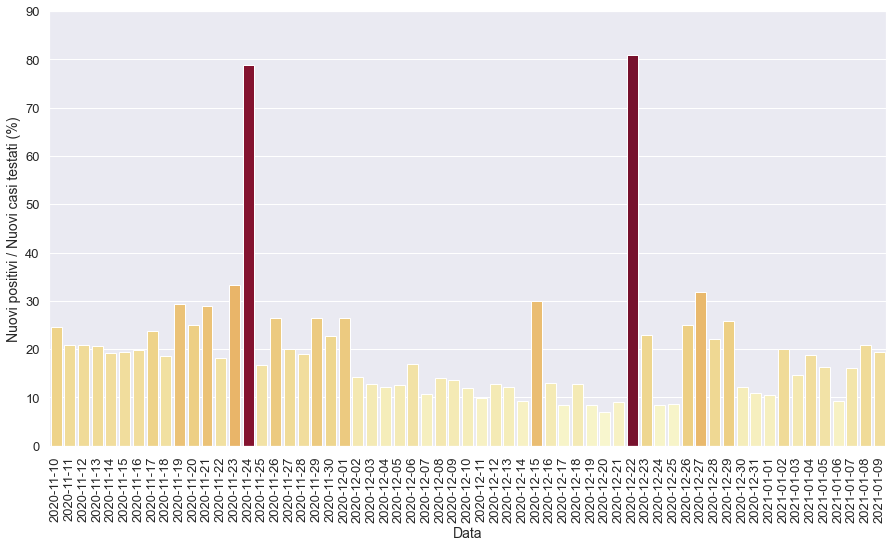

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

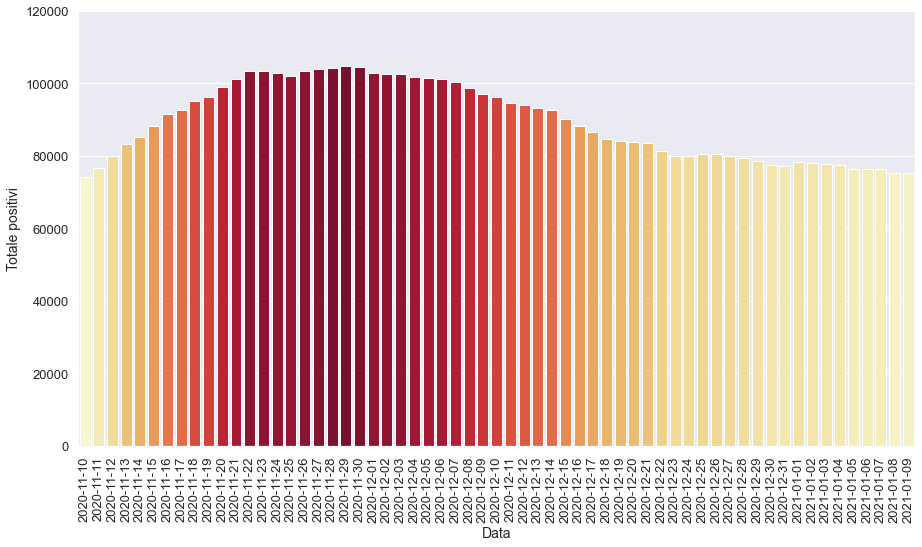

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

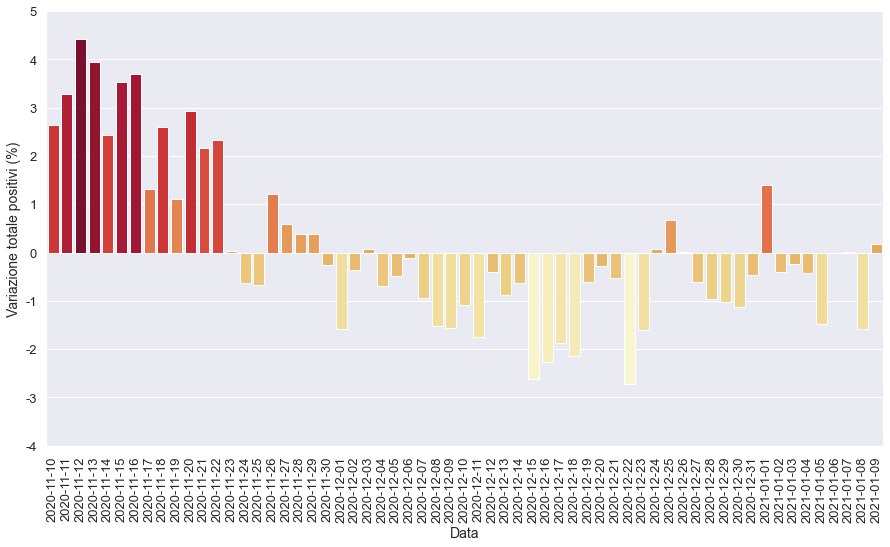

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

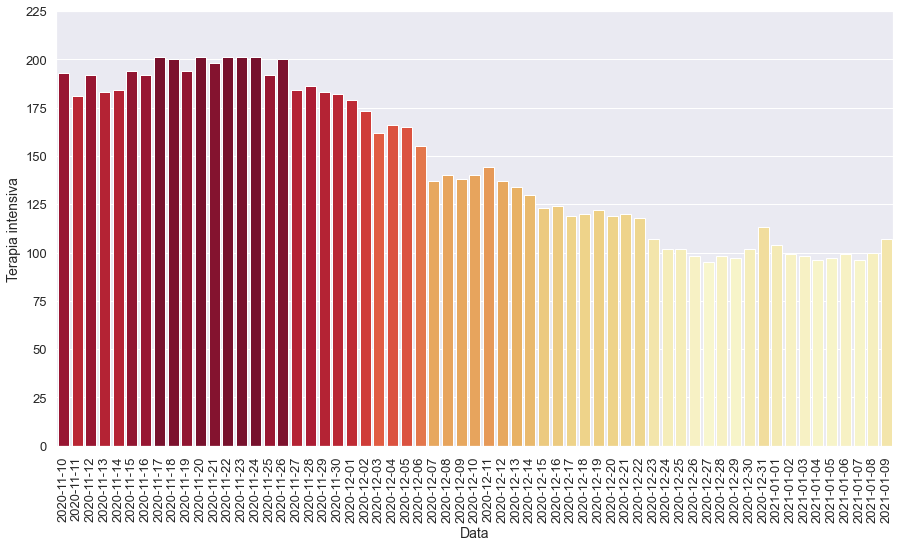

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

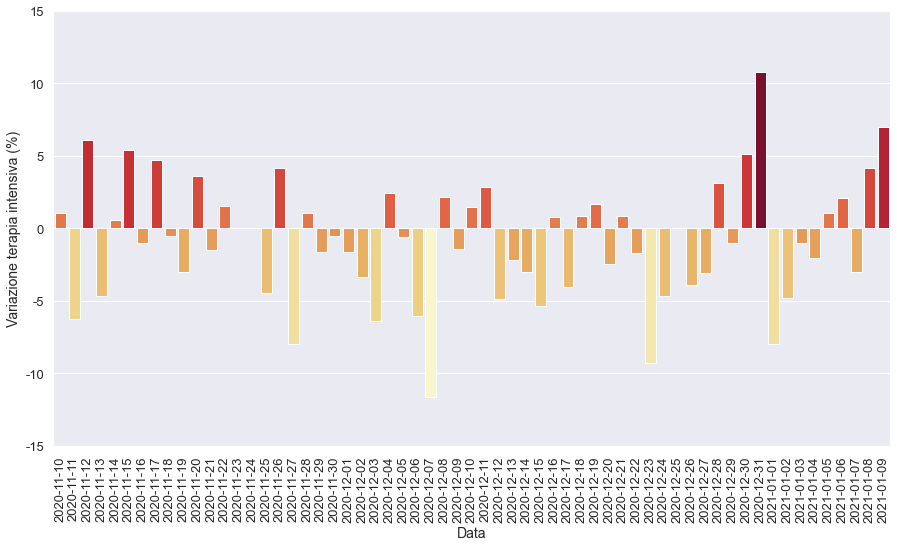

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

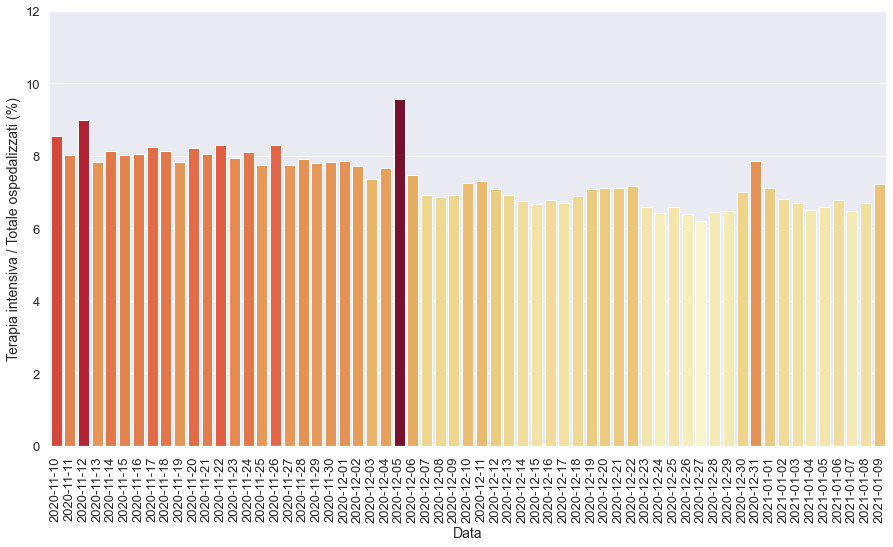

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

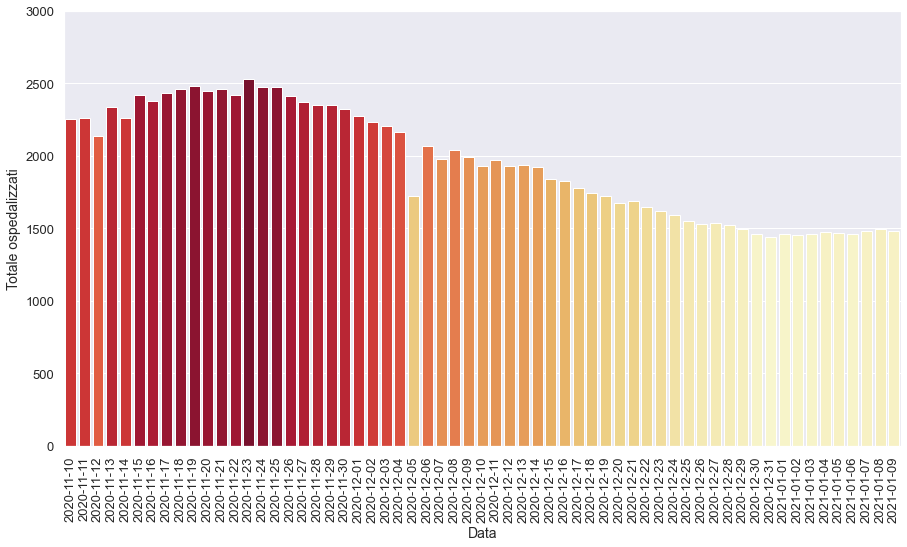

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

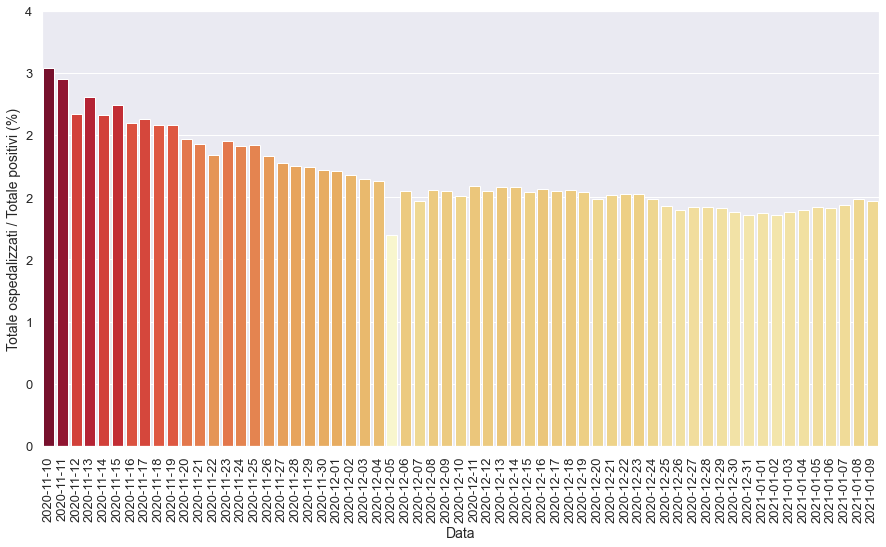

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

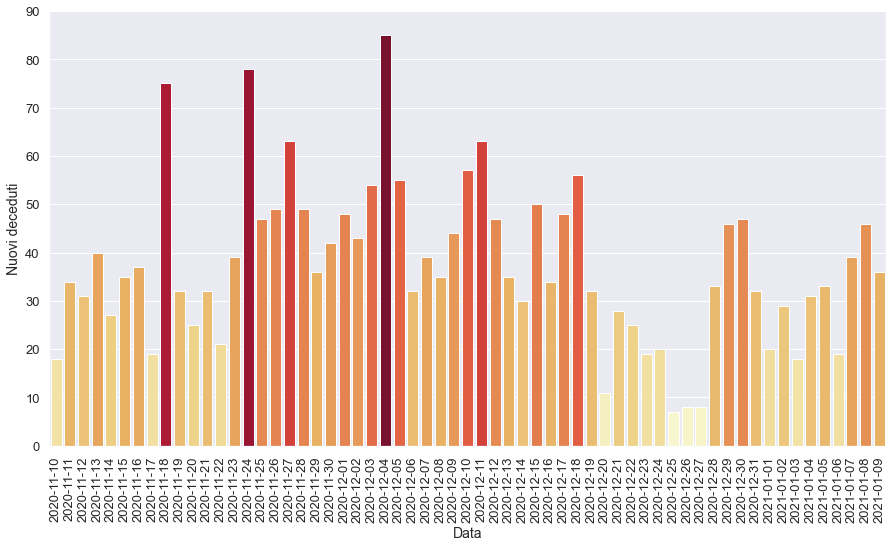

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

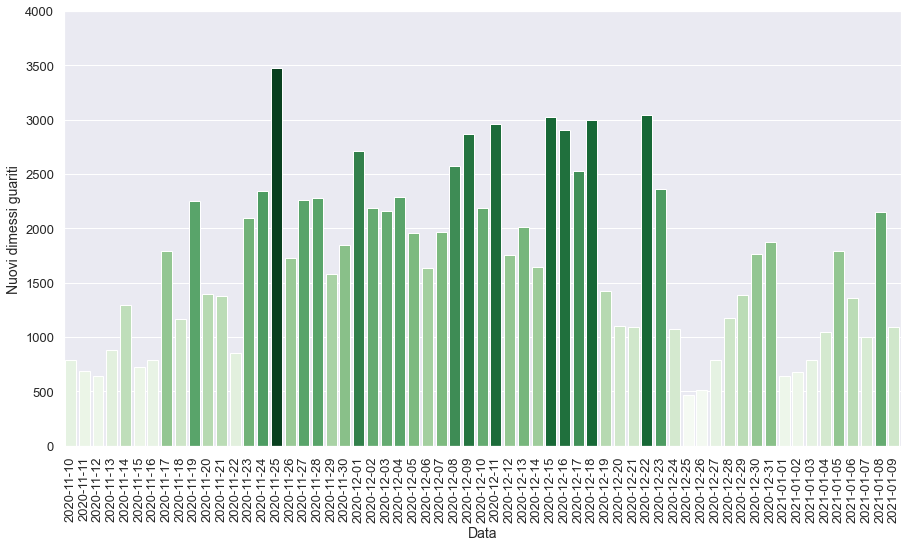

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-10T17:00:00,15,Campania,1789,140,1929,94236,96165,-1048,1198,...,57.0,14106.0,10002.0,-987.0,7.26,2.01,8.49,11.98,1.45,-1.08
1,2020-12-11T17:00:00,15,Campania,1828,144,1972,92508,94480,-1685,1340,...,63.0,18023.0,13521.0,-1728.0,7.30,2.09,7.43,9.91,2.86,-1.75
2,2020-12-12T17:00:00,15,Campania,1794,137,1931,92158,94089,-391,1414,...,47.0,19663.0,11034.0,-350.0,7.09,2.05,7.19,12.81,-4.86,-0.41
3,2020-12-13T17:00:00,15,Campania,1804,134,1938,91322,93260,-829,1219,...,35.0,17319.0,10032.0,-836.0,6.91,2.08,7.04,12.15,-2.19,-0.88
4,2020-12-14T17:00:00,15,Campania,1796,130,1926,90744,92670,-590,1088,...,30.0,15472.0,11648.0,-578.0,6.75,2.08,7.03,9.34,-2.99,-0.63
5,2020-12-15T17:00:00,15,Campania,1720,123,1843,88399,90242,-2428,647,...,50.0,8441.0,2164.0,-2345.0,6.67,2.04,7.66,29.90,-5.38,-2.62
6,2020-12-16T17:00:00,15,Campania,1701,124,1825,86379,88204,-2038,900,...,34.0,14757.0,6963.0,-2020.0,6.79,2.07,6.10,12.93,0.81,-2.26
7,2020-12-17T17:00:00,15,Campania,1656,119,1775,84778,86553,-1651,927,...,48.0,15130.0,11059.0,-1601.0,6.70,2.05,6.13,8.38,-4.03,-1.87
8,2020-12-18T17:00:00,15,Campania,1621,120,1741,82956,84697,-1856,1201,...,56.0,18146.0,9403.0,-1822.0,6.89,2.06,6.62,12.77,0.84,-2.14
9,2020-12-19T17:00:00,15,Campania,1598,122,1720,82470,84190,-507,949,...,32.0,15739.0,11372.0,-486.0,7.09,2.04,6.03,8.35,1.67,-0.60


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

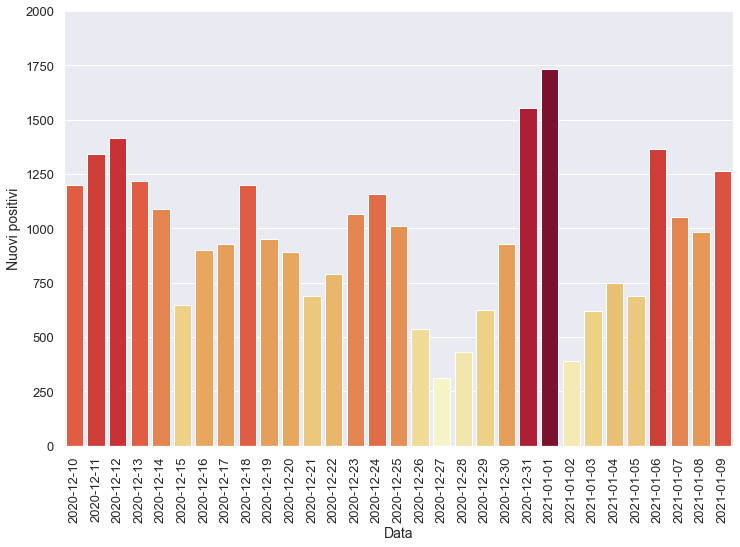

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

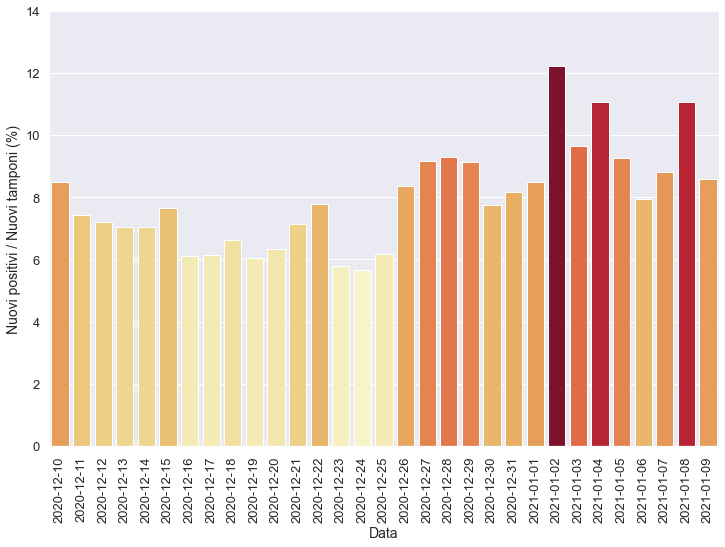

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

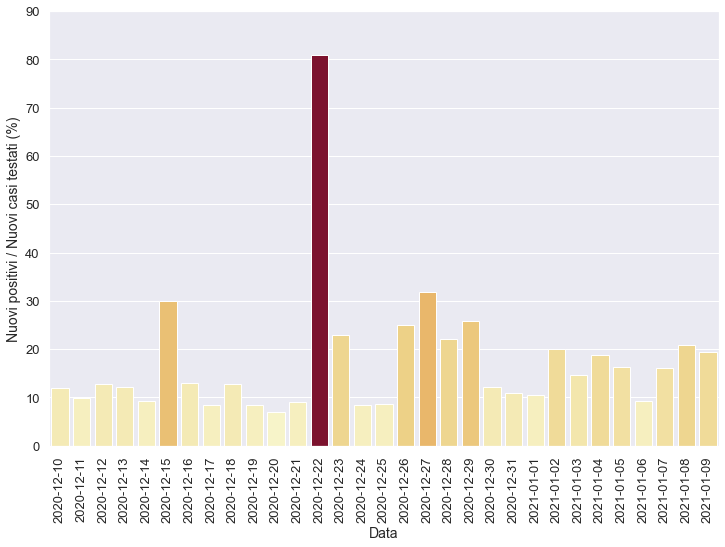

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

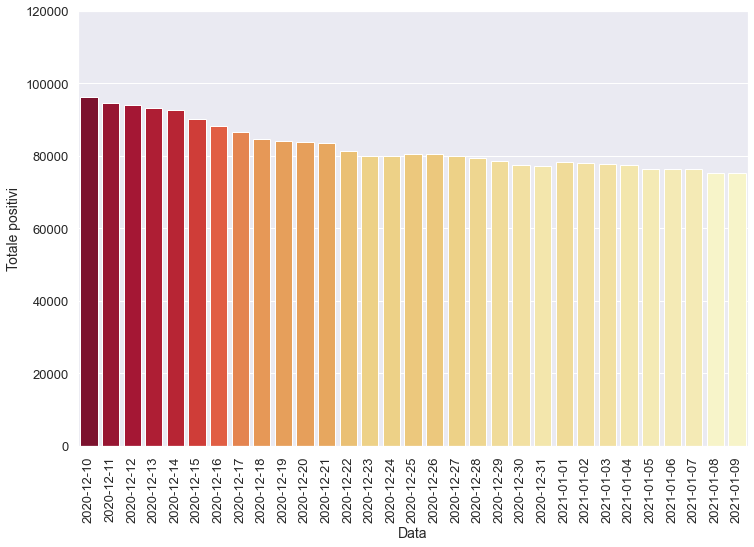

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

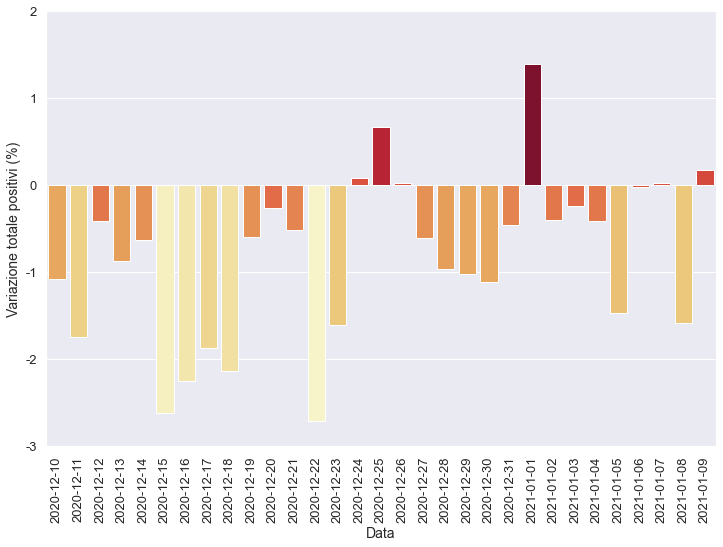

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

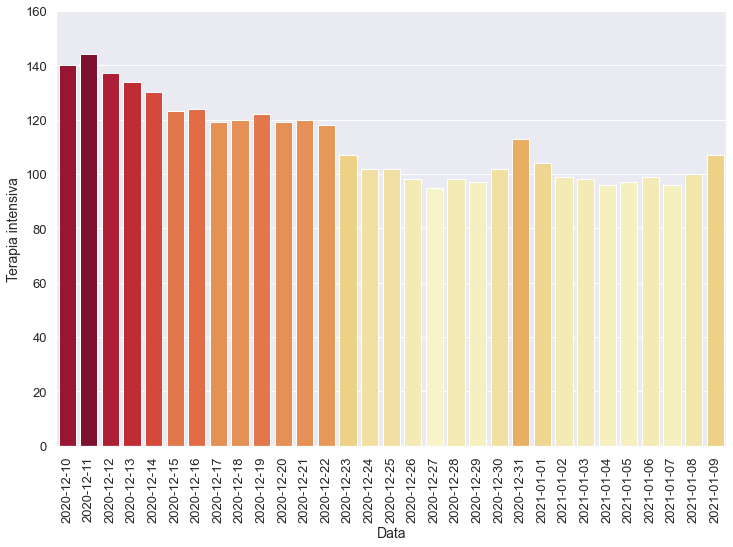

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

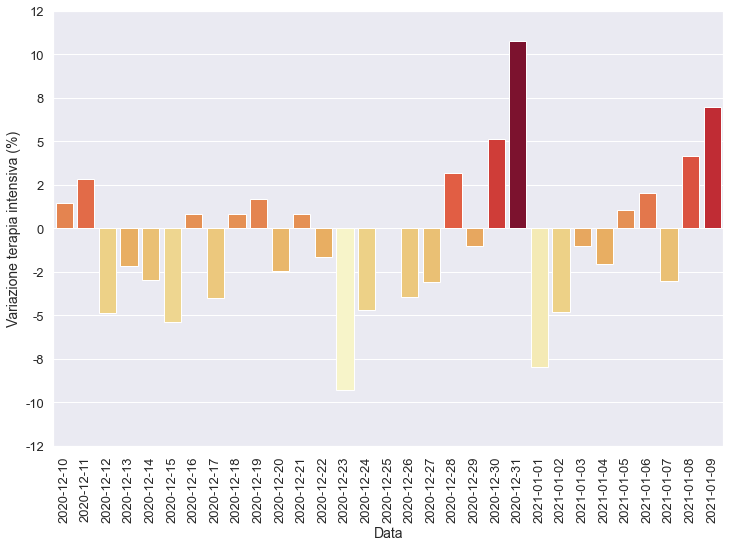

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

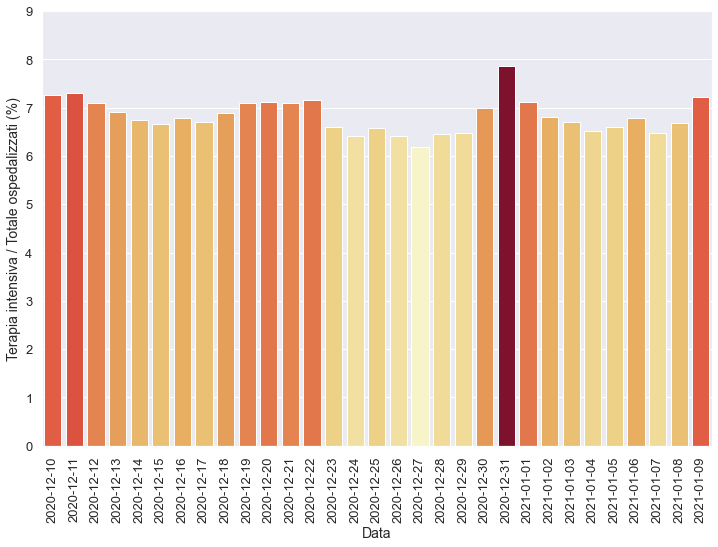

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

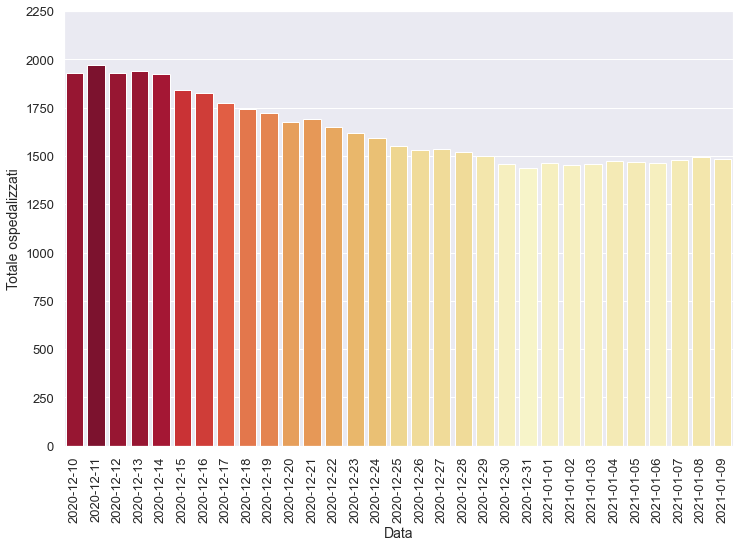

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

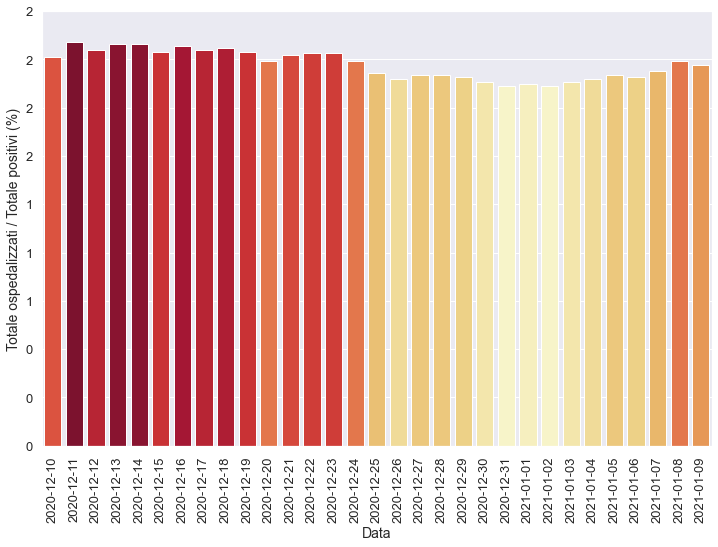

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

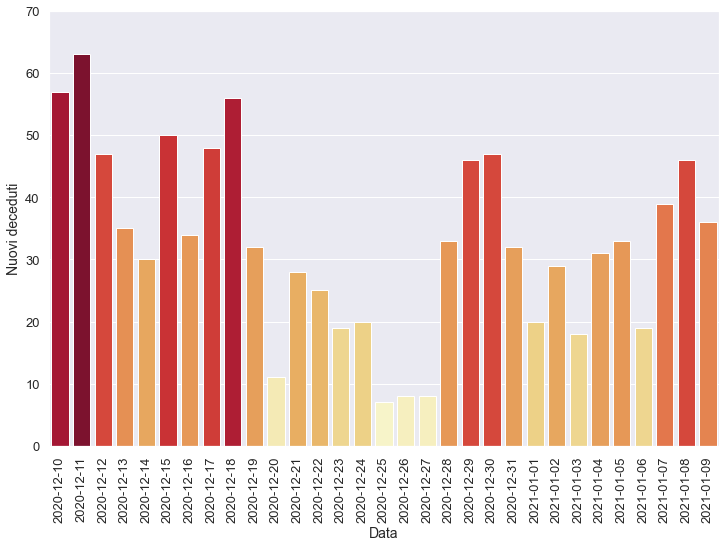

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

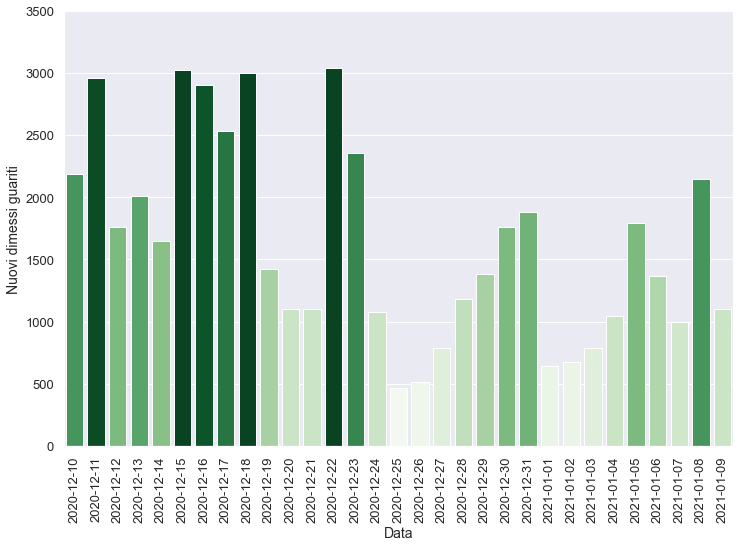

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-02T17:00:00,15,Campania,1355,99,1454,76561,78015,-313,392,...,29.0,3209.0,1964.0,-304.0,6.81,1.86,12.22,19.96,-4.81,-0.40
1,2021-01-03T17:00:00,15,Campania,1362,98,1460,76365,77825,-190,619,...,18.0,6411.0,4219.0,-196.0,6.71,1.88,9.66,14.67,-1.01,-0.24
2,2021-01-04T17:00:00,15,Campania,1377,96,1473,76024,77497,-328,747,...,31.0,6743.0,3964.0,-341.0,6.52,1.90,11.08,18.84,-2.04,-0.42
3,2021-01-05T17:00:00,15,Campania,1372,97,1469,74891,76360,-1137,688,...,33.0,7425.0,4193.0,-1133.0,6.60,1.92,9.27,16.41,1.04,-1.47
4,2021-01-06T17:00:00,15,Campania,1362,99,1461,74882,76343,-17,1366,...,19.0,17212.0,14675.0,-9.0,6.78,1.91,7.94,9.31,2.06,-0.02
5,2021-01-07T17:00:00,15,Campania,1385,96,1481,74878,76359,16,1052,...,39.0,11930.0,6493.0,-4.0,6.48,1.94,8.82,16.20,-3.03,0.02
6,2021-01-08T17:00:00,15,Campania,1395,100,1495,73651,75146,-1213,984,...,46.0,8889.0,4697.0,-1227.0,6.69,1.99,11.07,20.95,4.17,-1.59
7,2021-01-09T17:00:00,15,Campania,1376,107,1483,73793,75276,130,1263,...,36.0,14714.0,6482.0,142.0,7.22,1.97,8.58,19.48,7.00,0.17


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

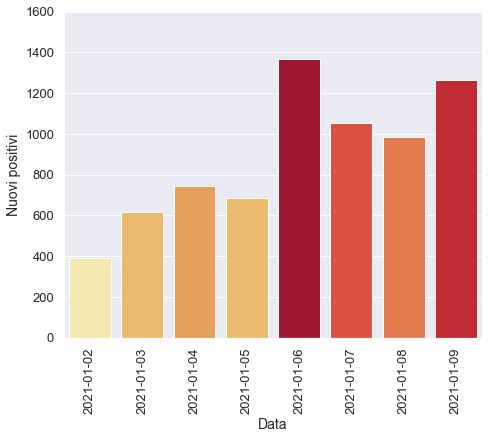

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

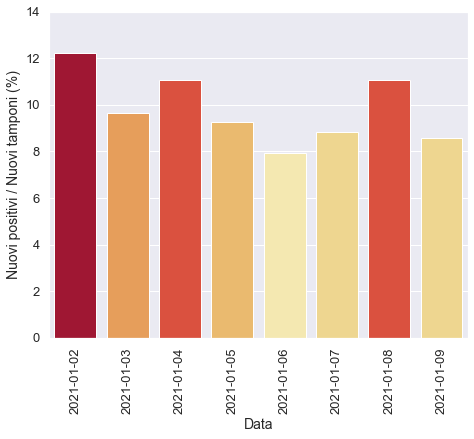

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

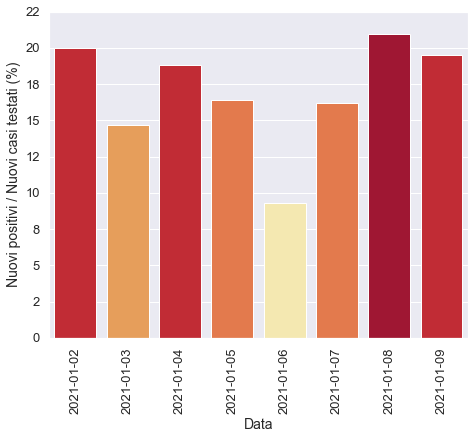

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

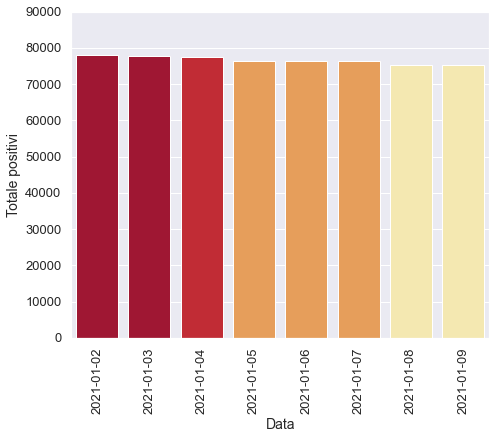

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

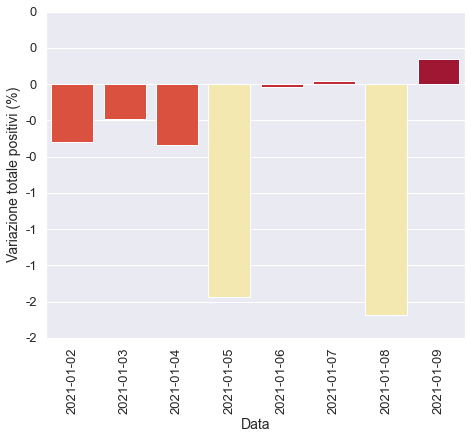

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

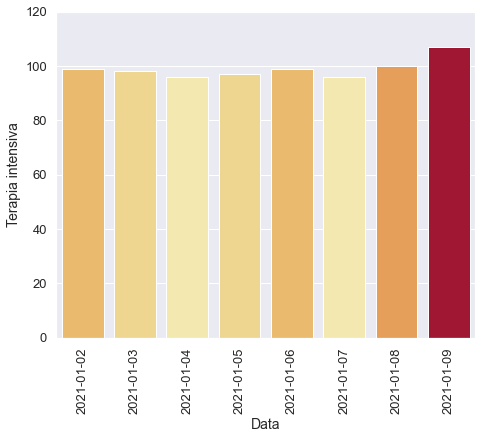

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

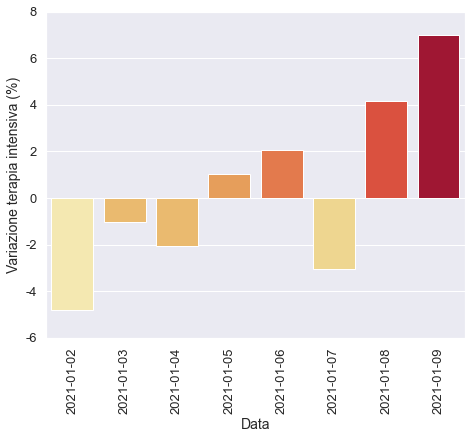

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

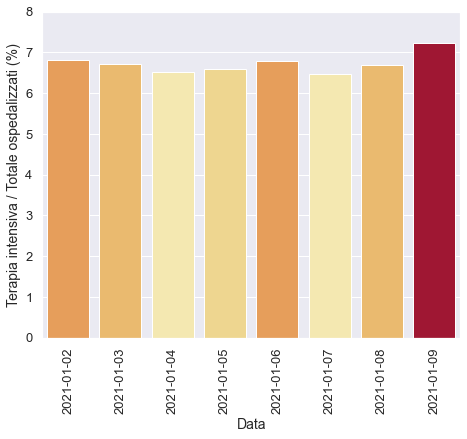

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

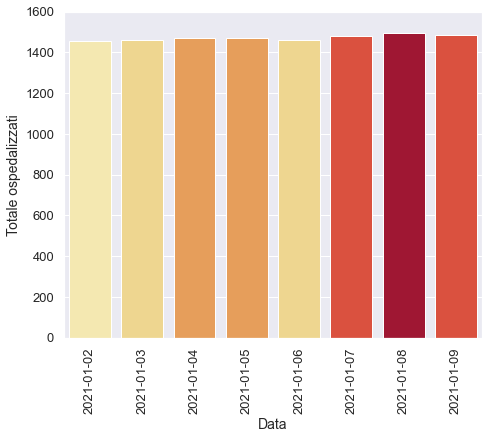

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

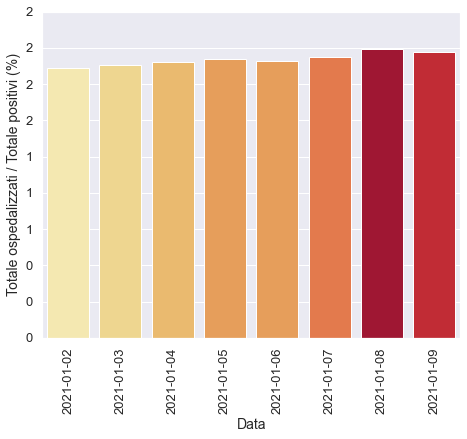

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

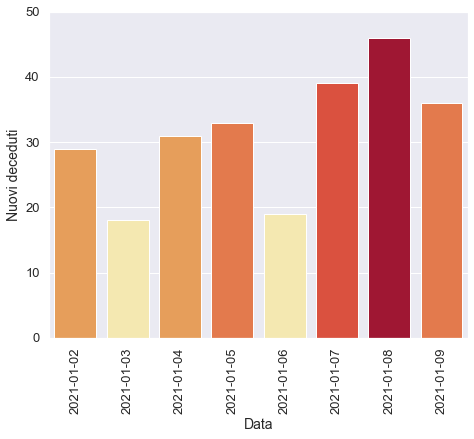

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

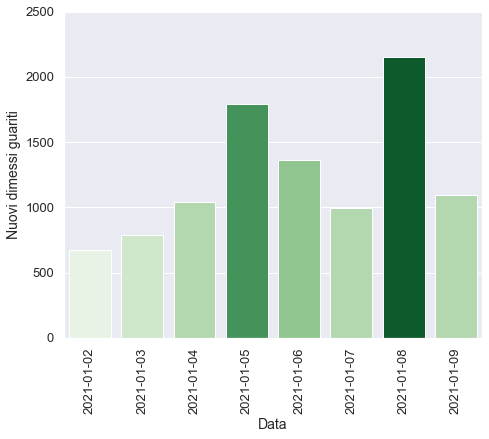

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)